In [2]:
import numpy as np
import pandas as pd



In [3]:
xtrain = pd.read_pickle("modified_x_train.pkl")
ytrain = pd.read_pickle("modified_y_train.pkl")
test = pd.read_pickle("modified_x_test.pkl")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [5]:
logReg = LogisticRegression(solver='saga')
linReg = LinearRegression()

linReg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
train_pp = pd.read_csv("new_train.csv")
train_pp.head()

,assists,boosts,DBNOs,headshotKills,heals,killPlace,killStreaks,longestKill,matchDuration,numGroups,...,pct_killed,pct_knocked,pct_kills_by_team,afk,cheater,killsNorm,damageDealtNorm,maxPlaceNorm,Id,winPlacePerc
0,0,0,0,0,0,60,0,0.00,1306,26,...,0.000000,0.0,0.043011,0,0,0.00,0.0000,29.12,7f96b2f878858a,0.4444
1,0,0,0,0,0,57,0,0.00,1777,25,...,0.000000,0.0,0.045455,0,0,0.00,99.7023,28.34,eef90569b9d03c,0.6400
2,1,0,0,0,0,47,0,0.00,1318,47,...,0.000000,0.0,0.020619,0,0,0.00,69.3600,51.00,1eaf90ac73de72,0.7755
3,0,0,0,0,0,75,0,0.00,1436,30,...,0.000000,0.0,0.000000,0,0,0.00,35.8610,33.79,4616d365dd2853,0.1667
4,0,0,0,0,0,45,1,58.53,1424,95,...,0.010309,0.0,0.010309,0,0,1.03,103.0000,99.91,315c96c26c9aac,0.1875


In [7]:
sample_train = xtrain_pp.sample(frac=0.05)
sample_y_train = sample_train['winPlacePerc']

dropColumns = ['Id', 'winPlacePerc']
sample_train.drop(dropColumns, axis = 1, inplace = True) 

sample_train.to_csv('5_feature_X_train', index = False)
sample_y_train.to_csv('5_feature_y_train', index = False)

In [40]:
# Linear Regression using Clive's preprocessed data
xtrain_pp = train_pp.iloc[:,0:44]

In [36]:
ytrain_pp = train_pp.loc[:, 'winPlacePerc']

In [42]:
linReg.fit(xtrain_pp, ytrain_pp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytrain_pp, linReg.predict(xtrain_pp))

0.08608286905320628

In [77]:
feat_coefs = linReg.coef_
feat_names = xtrain_pp.columns


print(feat_coefs[23] < 1 or feat_coefs[22] > -1)
print(feat_names.shape)


important_coefs = []
important_names = []

for i in range(0, 44):
    if(feat_coefs[i] > 100 or feat_coefs[i] < -100):
        important_coefs.append(feat_coefs[i])
        important_names.append(feat_names[i])

print(important_coefs, important_names)

True
(44,)
[7071188.2113882415, 7071188.197292174, 1651304.0562841364, 1651304.0563964953, 1651304.0563708371, 2261539.905320178, -4809648.306094578, -2261539.895555538, -1651304.0562679623] ['boosts', 'heals', 'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired', 'heals_and_boosts', 'total_items_acquired', 'total_distance']


<BarContainer object of 9 artists>

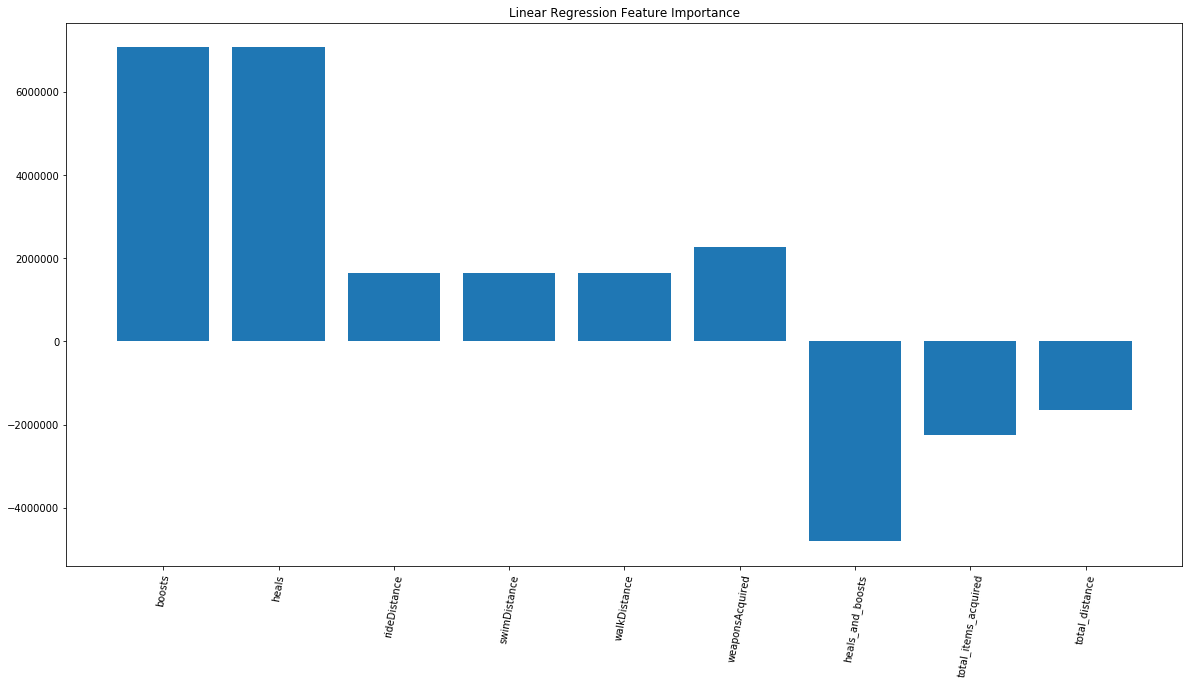

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Linear Regression Feature Importance')
plt.xticks(rotation=80)
plt.bar(important_names, important_coefs)

In [55]:
linReg.coef_

array([-2.93452552e-03,  7.07118821e+06, -1.81327667e-02,  4.37048726e-02,
        7.07118820e+06, -7.24250818e-03, -1.26697384e-01, -3.99804780e-06,
       -1.45721452e-04, -7.16744145e-04,  2.32851601e-03,  1.65130406e+06,
        1.67207396e-02,  1.65130406e+06, -1.13288340e-02,  4.98348152e-03,
        1.65130406e+06,  2.26153991e+06,  4.80738166e-03, -2.01708266e-02,
        4.20601548e-02, -4.80964831e+06, -2.26153990e+06, -1.02877071e-01,
        1.97494419e-03, -6.21146186e-04, -1.65130406e+06, -1.40639512e-01,
        1.20584028e+01,  1.20397876e+01, -1.20357516e+01,  1.13494104e-02,
       -8.54619892e-03,  4.16650612e-05,  8.24834954e-03,  2.91401509e-03,
        7.25923269e-01,  4.20186466e-01, -1.52231552e-01, -4.22089390e-02,
        1.92952842e-01, -3.61473782e-02,  4.79574272e-05,  1.14155106e-03])